In [115]:
import yfinance as yf
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Importo lla información de las empresas del S&P500 de Wikipedia

In [90]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500 = pd.read_html(url)

In [110]:
df_sp500 = sp500[0]
df_sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3N,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


### Buscando los tickers con "." para reemplazarlos por "-" ya que al importar de yfinance se encuentran con "-"

In [93]:

for i in df_sp500['Symbol'].values:
  if i.find('.')!=-1:
    print(i)

BRK.B
BF.B


### Hago el reemplazo de "." por "-"

In [94]:
df_sp500['Symbol'].replace('BRK.B','BRK-B',inplace=True)
df_sp500['Symbol'].replace('BF.B','BF-B',inplace=True)

### Teniendo todos los nombres correctos de los tickers, hago la descarga de la información de precios con la librería yfinance

In [112]:
symbols = df_sp500['Symbol'].to_list()
df = yf.download(symbols,start='2000-01-01',end=date.today())[['Adj Close','Volume']]
df.tail()

[*********************100%***********************]  503 of 503 completed


Adj Close                                                         \
                     A    AAL         AAP        AAPL        ABBV         ABC   
Date                                                                            
2023-02-21  143.419998  15.69  144.190002  148.479996  152.000000  160.839996   
2023-02-22  142.080002  15.56  143.619995  148.910004  150.669998  160.130005   
2023-02-23  143.199997  15.87  142.009995  149.399994  152.070007  159.500000   
2023-02-24  141.199997  15.56  138.850006  146.710007  152.710007  158.570007   
2023-02-27  142.179993  15.63  140.630005  147.919998  154.279999  156.630005   

                                                           ...     Volume  \
                   ABT       ACGL         ACN        ADBE  ...       WYNN   
Date                                                       ...              
2023-02-21  103.650002  67.550003  269.149994  346.700012  ...  1894500.0   
2023-02-22  102.690002  67.940002  269.630005  348.720001  ...  3375500.0   
2023-02-23  102.550003  68.379997  271.230011  347.019989  ...  1820700.0   
2023-02-24  100.459999  69.169998  266.529999  320.540009  ...  1942900.0   
2023-02-27   99.769997  69.209999  266.250000  322.320007  ...  2259000.0   

                                                                               \
                XEL       XOM     XRAY        XYL      YUM        ZBH    ZBRA   
Date                                                                            
2023-02-21  2664000  14469400  1574100  1568600.0  1739800  1266800.0  375000   
2023-02-22  2080600  13973800  1195900  1498800.0  1977100  1260100.0  309000   
2023-02-23  2415800  11289400  1434600  1527400.0  2219000   993600.0  444800   
2023-02-24  2293000  14338500  2353800  1197900.0  1836700   878300.0  415300   
2023-02-27  1820300  11710500  1800800  1391600.0  1963100  1180100.0  547800   

                                
               ZION        ZTS  
Date                            
2023-02-21  1364900  1791300.0  
2023-02-22  1301100  2103800.0  
2023-02-23  1327400  1769000.0  
2023-02-24  1296200  1843200.0  
2023-02-27  1167800  1183700.0  

[5 rows x 1006 columns]

### Convierto el índice a tipo de dato datetime para poder manipularlo como fecha

In [113]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)
df.drop(columns='Date', inplace=True)
df.head()

C:\Users\libra\AppData\Local\Temp\ipykernel_5516\3950225725.py:4: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Adj Close                                                       \
                    A AAL AAP      AAPL ABBV       ABC       ABT      ACGL   
Date                                                                         
2000-01-03  44.001270 NaN NaN  0.850644  NaN  2.988897  9.221022  1.277778   
2000-01-04  40.640064 NaN NaN  0.778926  NaN  2.784837  8.957564  1.270833   
2000-01-05  38.119133 NaN NaN  0.790324  NaN  3.000901  8.941101  1.388889   
2000-01-06  36.667721 NaN NaN  0.721931  NaN  3.228969  9.253956  1.375000   
2000-01-07  39.723370 NaN NaN  0.756127  NaN  3.649096  9.352756  1.451389   

                           ... Volume                                  \
           ACN       ADBE  ...   WYNN      XEL       XOM     XRAY XYL   
Date                       ...                                          
2000-01-03 NaN  16.274668  ...    NaN  2738600  13458200   582300 NaN   
2000-01-04 NaN  14.909399  ...    NaN   425200  14510800   317700 NaN   
2000-01-05 NaN  15.204174  ...    NaN   500200  17485000  1188000 NaN   
2000-01-06 NaN  15.328290  ...    NaN   344100  19461600   534300 NaN   
2000-01-07 NaN  16.072983  ...    NaN   469500  16603800  1401000 NaN   

                                               
                YUM ZBH     ZBRA     ZION ZTS  
Date                                           
2000-01-03  3033493 NaN  1055700  1199600 NaN  
2000-01-04  3315031 NaN   522450   816100 NaN  
2000-01-05  4642602 NaN   612225  1124700 NaN  
2000-01-06  3947658 NaN   263925  1112100 NaN  
2000-01-07  6063647 NaN   333900   782000 NaN  

[5 rows x 1006 columns]

### Separo la info de volumen

In [114]:
volumen=df['Volume']
volumen.tail()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-21,1693800,24449000.0,1270000.0,58867200,8466100.0,1239400,5204300,2137600,2446200.0,3002700,...,1894500.0,2664000,14469400,1574100,1568600.0,1739800,1266800.0,375000,1364900,1791300.0
2023-02-22,1691300,22273800.0,1785900.0,51011300,6041700.0,945300,8900900,1498000,1823800.0,2599300,...,3375500.0,2080600,13973800,1195900,1498800.0,1977100,1260100.0,309000,1301100,2103800.0
2023-02-23,1511500,25607100.0,1597600.0,48394200,5993300.0,848500,4611100,2478500,1885500.0,3154500,...,1820700.0,2415800,11289400,1434600,1527400.0,2219000,993600.0,444800,1327400,1769000.0
2023-02-24,1522100,20457700.0,2079600.0,55418200,5621100.0,1101200,5476800,1181700,1735000.0,8442000,...,1942900.0,2293000,14338500,2353800,1197900.0,1836700,878300.0,415300,1296200,1843200.0
2023-02-27,1149600,15494300.0,2467500.0,44998500,6828800.0,1010200,4489800,1469200,1512900.0,3500600,...,2259000.0,1820300,11710500,1800800,1391600.0,1963100,1180100.0,547800,1167800,1183700.0


### Busco los tickers cuyos volumenes del último día sean outliers de los últimos 20 días y además solo los que sean mayores al máximo

A       error
AAL     error
AAP        ok
AAPL    error
ABBV    error
        ...  
YUM     error
ZBH     error
ZBRA    error
ZION    error
ZTS     error
Length: 503, dtype: object

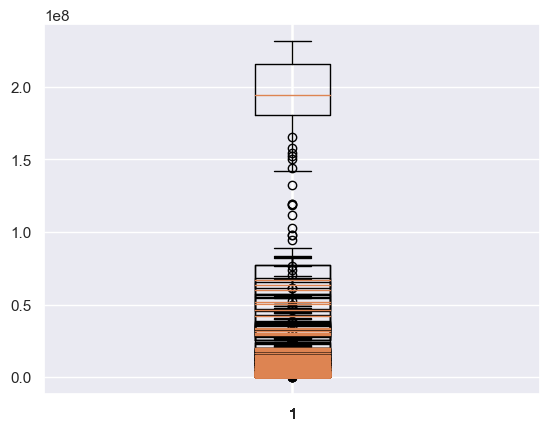

In [116]:
# aqui
def get_volumen_outliers(data):
    
    data=data.tail(20)
    bp=plt.boxplot(data)
    if data.iloc[-1] in bp['fliers'][0].get_data()[1] and data.iloc[-1]>data.iloc[-2]:
        return 'ok'
    else:
        return 'error'
    
resultado = volumen.apply(get_volumen_outliers, axis=0)
resultado

In [118]:
resultado=resultado.reset_index()
resultado.columns=['ticker','resultado']
resultado[resultado['resultado']=='ok']

,ticker,resultado
2,AAP,ok
16,AES,ok
233,ICE,ok
259,KDP,ok
280,LNT,ok
439,TGT,ok
461,UNP,ok


### Compruebo con el primer caso que efectivamente tenga un outlier el último día (27/02/2023)

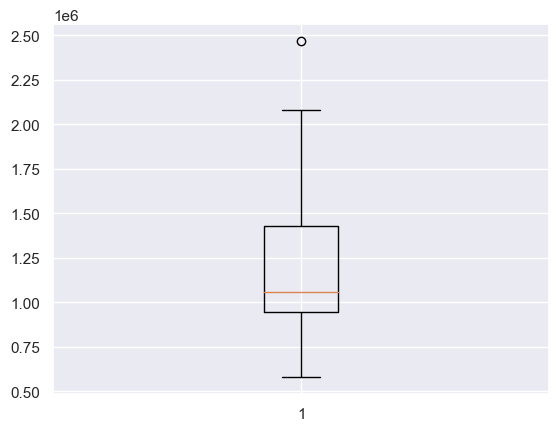

Date
2023-01-30     961500.0
2023-01-31    1841600.0
2023-02-01    1010500.0
2023-02-02     737000.0
2023-02-03     580700.0
2023-02-06     827200.0
2023-02-07     924800.0
2023-02-08    1026000.0
2023-02-09    1025600.0
2023-02-10    1115200.0
2023-02-13     695400.0
2023-02-14     954500.0
2023-02-15    1094200.0
2023-02-16    1369300.0
2023-02-17    1279600.0
2023-02-21    1270000.0
2023-02-22    1785900.0
2023-02-23    1597600.0
2023-02-24    2079600.0
2023-02-27    2467500.0
Name: AAP, dtype: float64


In [124]:

plt.boxplot(volumen['AAP'].tail(20))
plt.show()
print(volumen['AAP'].tail(20))

In [177]:
aapl=yf.Ticker('^GSPC')
df=aapl.history(start='2000-01-03', end='2023-02-24')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-16 00:00:00-05:00,4114.750000,4136.540039,4089.489990,4090.409912,4143660000,0.0,0.0
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,0.0,0.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,0.0,0.0


### Chekeo la cantidad de empresas por Sector

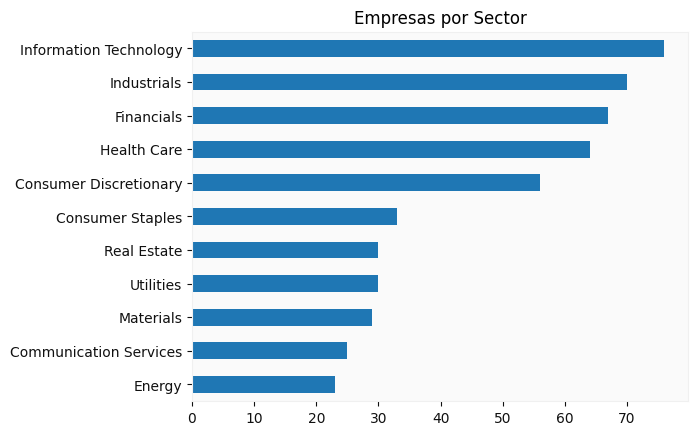

In [133]:
df_sp500['GICS Sector'].value_counts().sort_values().plot(kind='barh',title='Empresas por Sector', grid=False)
plt.show()